In [1]:
import networkx as nx
from graphs import (generate_politician_party_relation, 
generate_politician_org_relation, 
generate_politician_party_relation,
generate_politician_lobbyist_relation, 
generate_lobbyist_org_relation,
query_politician_party,
query_lobbyist_org,
query_politician_org,
query_politician_lobbyst)

import matplotlib.pyplot as plt

In [2]:
graph = nx.DiGraph()
graph = generate_politician_party_relation(graph, 10)
#graph = generate_politician_org_relation(graph, 0, 70)
graph = generate_politician_lobbyist_relation(graph)
graph = generate_lobbyist_org_relation(graph)


In [5]:
attributes = nx.get_node_attributes(graph, "type")
mapping = {
    "party": "green",
    "politician": "lightblue",
    "lobbyist": "blue",
    "organization": "orange"
}
colors = [mapping[attribute] for attribute in attributes.values()]

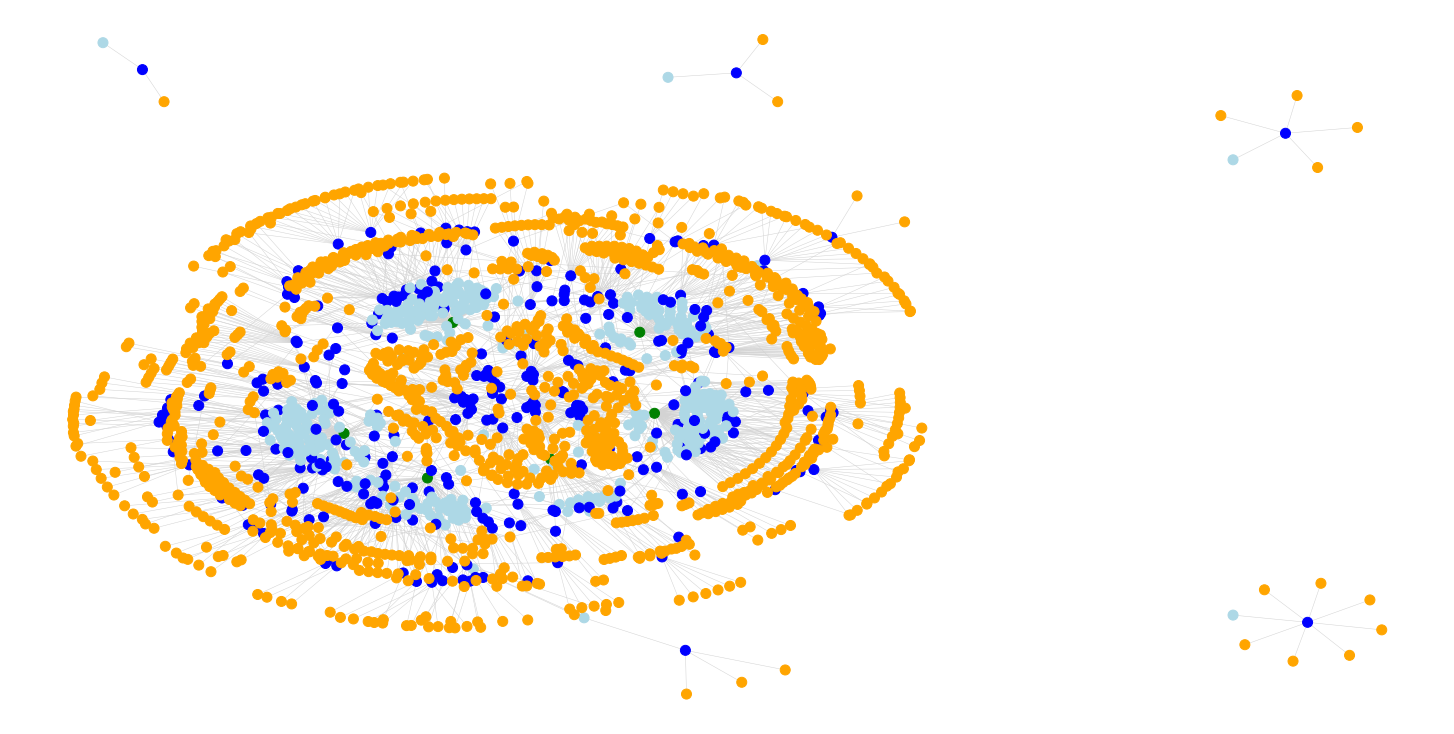

In [6]:
plt.figure(figsize=(16, 8))
pos = nx.nx_agraph.graphviz_layout(graph, prog="sfdp") #"dot", "sfdp", neato
#pos = nx.nx_agraph.graphviz_layout(graph)
#pos = nx.spring_layout(graph)

options = {
    'node_size': 100,
    'width': 0.5,
    'arrows': False,
    'edge_color': "lightgrey"
}
nx.draw(graph, node_color=colors, pos=pos, **options)
plt.show()